## Predict Cancellation for Hotel/Resorts

In [1]:
import numpy as np 
import pandas as pd 
import os

# data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Missing values:**
- country
- agent
- company
- children

### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data types:**

- `Categorical` - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status


- `Numerical` - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests


- `Ordinal` - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Exploratory Data Analysis

Percentage cancelation=  0.37041628277075134
reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Reservation status VS Cancellations')

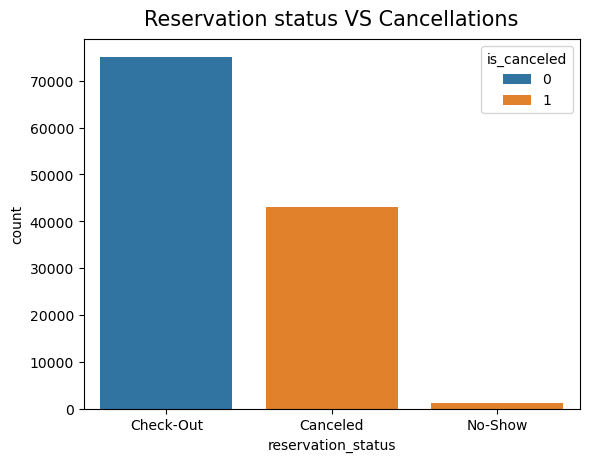

In [8]:
is_can = len(data[data['is_canceled'] == 1])

print("Percentage cancelation= ", is_can / len(data))
cancellation_types = data['reservation_status'].value_counts(normalize = True) * 100
print(cancellation_types)

sns.countplot(data = data, x = 'reservation_status', hue = 'is_canceled')
plt.title("Reservation status VS Cancellations", fontsize = 15, pad = 10)

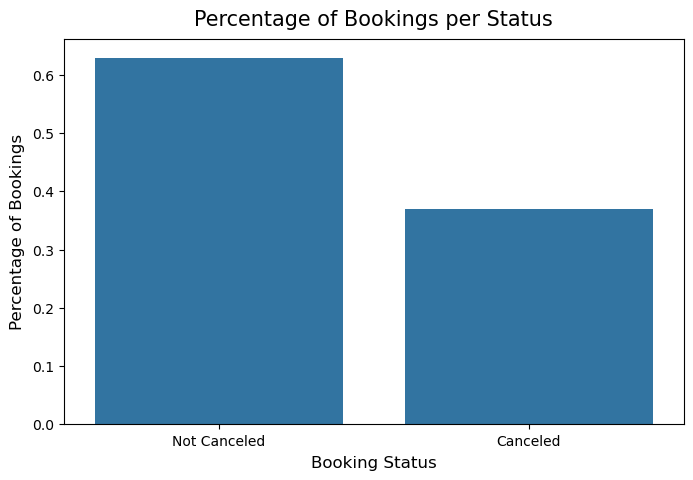

In [9]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Cancellations in resort hotel=  0.27763354967548676
Cancellations in city hotel=  0.41726963317786464


Text(0.5, 1.0, 'Total count of bookings and cancellations per hotel')

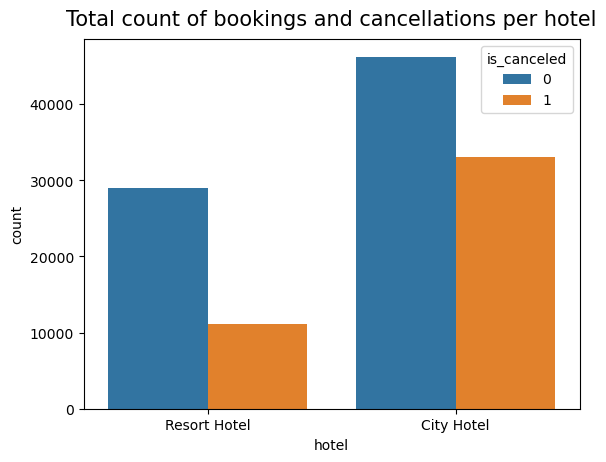

In [10]:
sns.countplot(data = data, x = 'hotel', hue = 'is_canceled')

resort_canceled = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 1)]
city_canceled = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

print('Cancellations in resort hotel= ', (len(resort_canceled)) / (len(data[data['hotel'] == 'Resort Hotel'])))
print('Cancellations in city hotel= ', (len(city_canceled)) / (len(data[data['hotel'] == 'City Hotel'])))

plt.title("Total count of bookings and cancellations per hotel", fontsize = 15, pad = 10)

City hotels have higher cancellation rate than resort hotels.(reasons for cancellations for city hotel)

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

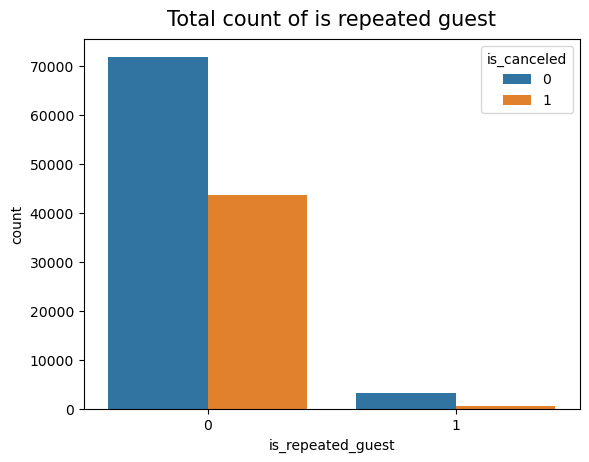

In [11]:
sns.countplot(data = data, x ='is_repeated_guest', hue ='is_canceled')

new_guest = data[(data['is_repeated_guest'] == 0) & (data['is_canceled']==1)]
old_guest = data[(data['is_repeated_guest'] == 1) & (data['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest)) / (len(data[data['is_repeated_guest'] == 0])))
print('Cancelations among old guests= ', (len(old_guest)) / (len(data[data['is_repeated_guest'] == 1])))

plt.title("Total count of is repeated guest", fontsize = 15, pad = 10)

The maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (**14%**). 

Text(0.5, 1.0, 'Total count of previous cancellations')

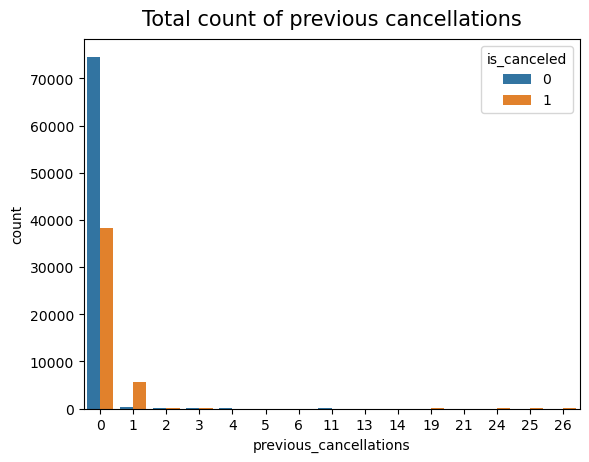

In [12]:
sns.countplot(data = data, x='previous_cancellations', hue='is_canceled')
plt.title("Total count of previous cancellations", fontsize = 15, pad = 10)

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. **This also matches with the positive correlation between `previous_cancellations` and `is_cancelled`**.

Text(0.5, 1.0, 'Booking Changes VS Cancellations')

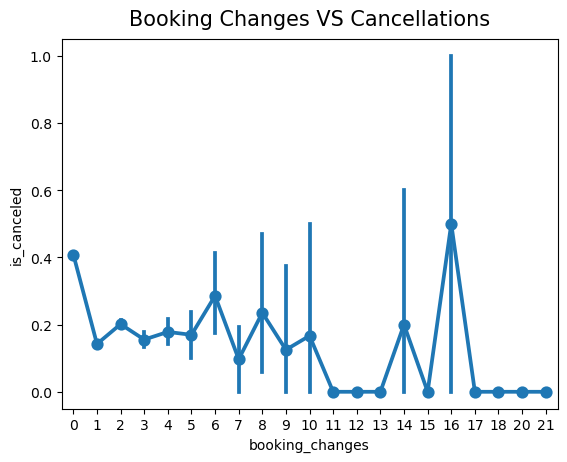

In [13]:
sns.pointplot(data = data, x = 'booking_changes', y = 'is_canceled')
plt.title("Booking Changes VS Cancellations", fontsize = 15, pad = 10)

There is no trend in and its impact on the cancellations of bookings.

Text(0.5, 1.0, 'Cancellation VS Deposit type')

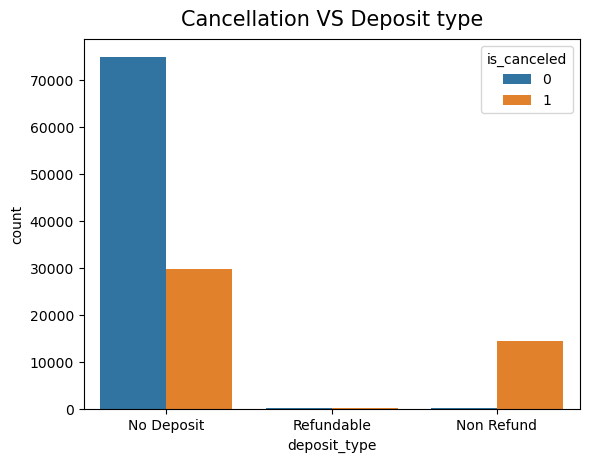

In [14]:
sns.countplot(x = "deposit_type", hue = "is_canceled", data = data);
plt.title("Cancellation VS Deposit type", fontsize = 15, pad = 10)

Bookings that are not refundable at the time of booking stand a high chance of cancellation.

Text(0.5, 1.0, 'Days in waiting VS cancellations')

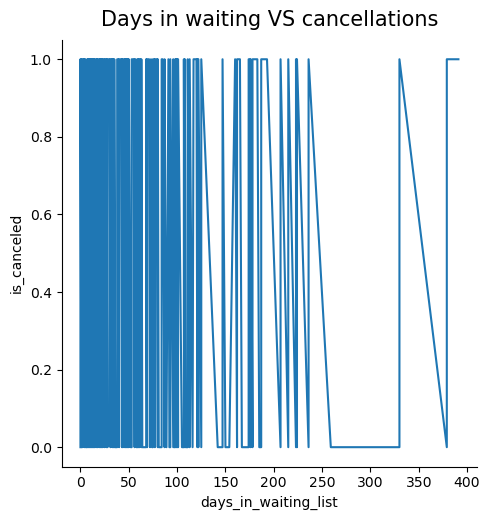

In [15]:
sns.relplot(data = data, x ='days_in_waiting_list', y = 'is_canceled', kind = 'line', estimator = None)
plt.title("Days in waiting VS cancellations", fontsize = 15, pad = 10)

No relation can be established between `days_in_waiting_list` and `is_canceled`. Therefore, we will take this feature for further analysis.


In [16]:
year_cancellations = data.groupby(['arrival_date_year'])['is_canceled'].sum()
year_cancellations

arrival_date_year
2015     8142
2016    20337
2017    15745
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Total number of bookings per year')

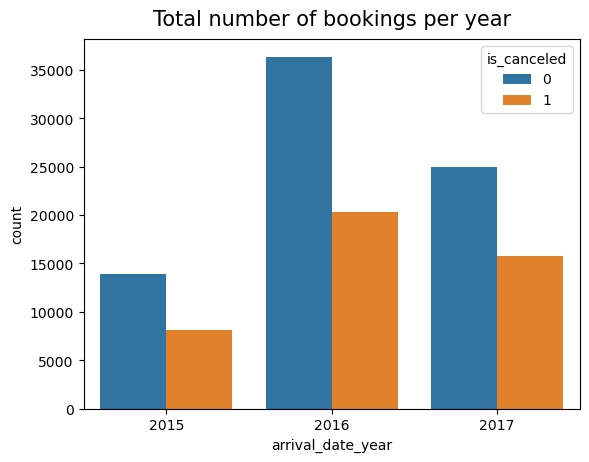

In [17]:
sns.countplot(data = data, x = 'arrival_date_year', hue = 'is_canceled')
plt.title("Total number of bookings per year", fontsize = 15, pad = 10)

In [18]:
max_bookings = data.groupby(['arrival_date_month'])['is_canceled'].count().sort_values(ascending = False)
print(max_bookings)

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: is_canceled, dtype: int64


Text(0.5, 1.0, 'Total Number of bookings per month')

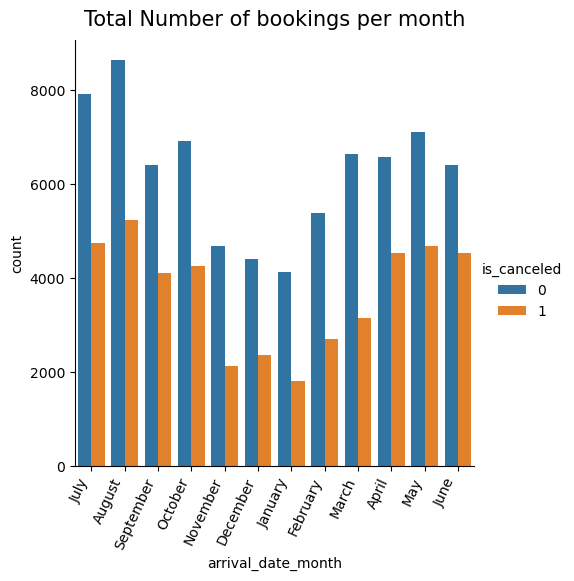

In [19]:
chart = sns.catplot(data = data, x = 'arrival_date_month', hue = 'is_canceled', kind = 'count')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total Number of bookings per month", fontsize = 15, pad = 10)

Maximum bookings in the year 2016 were in the months of July and August.

In [20]:
year_count = data.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name = 'count')
year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = data.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name = 'count')
month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                                     count
arrival_date_year arrival_date_year is_canceled           
2015              2015              0            62.984179
                                    1            37.015821
2016              2016              0            64.136703
                                    1            35.863297
2017              2017              0            61.302136
                                    1            38.697864
                                                       count
arrival_date_month arrival_date_month is_canceled           
April              April              0            59.202814
                                      1            40.797186
August             August             0            62.246883
                                      1            37.753117
December           December           0            65.029499
                                      1            34.970501
February           February           0 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34060\1573091891.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34060\1573091891.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))


Percentage of cancellations was higher in 2015 and 2017 despite higher number of bookings in 2016. April and June had the largest cancellations overall.

Text(0.5, 1.0, 'Total cancellations acorss market segment')

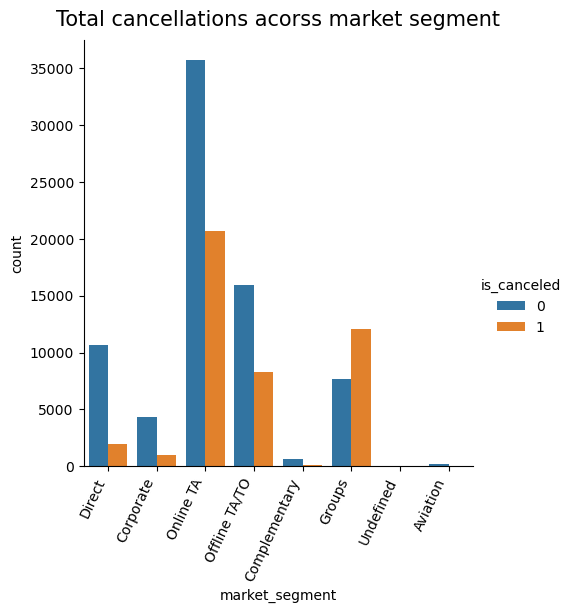

In [21]:
chart = sns.catplot(data = data, x = 'market_segment', kind = 'count', hue = 'is_canceled')
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total cancellations acorss market segment", fontsize = 15, pad = 10)

Text(0.5, 1.0, 'Distribution of cancellations in various channels')

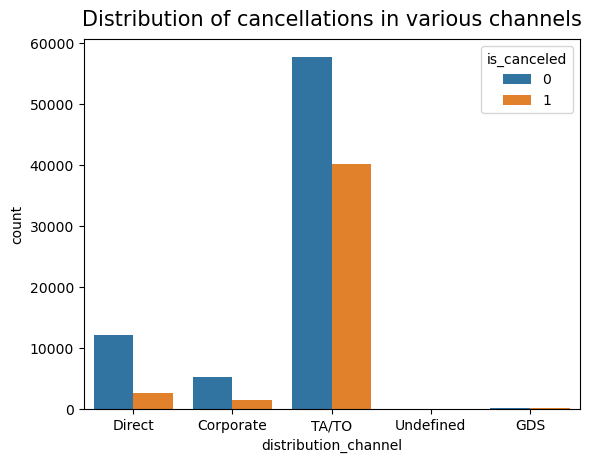

In [22]:
sns.countplot(data = data, x = 'distribution_channel', hue = 'is_canceled')
plt.title("Distribution of cancellations in various channels", fontsize = 15, pad = 10)

customer_type
Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Average Number of cancellations in each category')

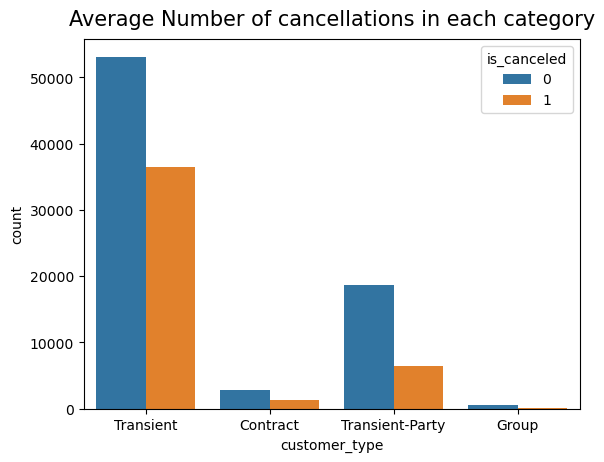

In [23]:
print(data['customer_type'].value_counts(normalize = True) * 100)
sns.countplot(data = data, x = 'customer_type', hue = 'is_canceled')
plt.title("Average Number of cancellations in each category", fontsize = 15, pad = 10)

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

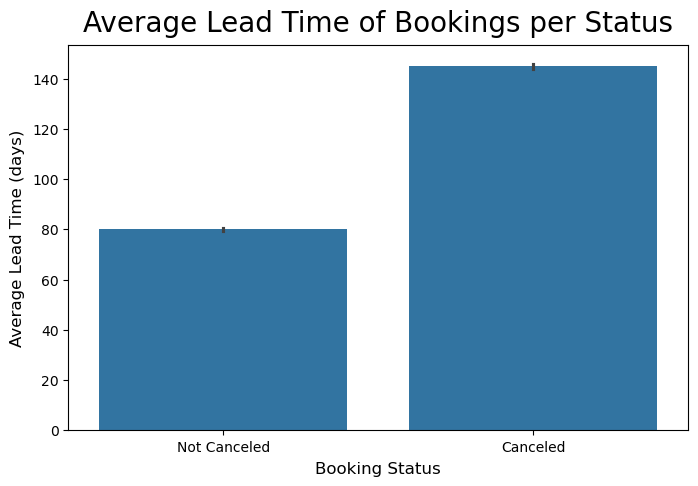

In [24]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Maximum cancellations occur if the booking is made 60-70 days before the check-in date. Longer the lead_time, lower is the cancellation. This invalidates our 2nd assumption.

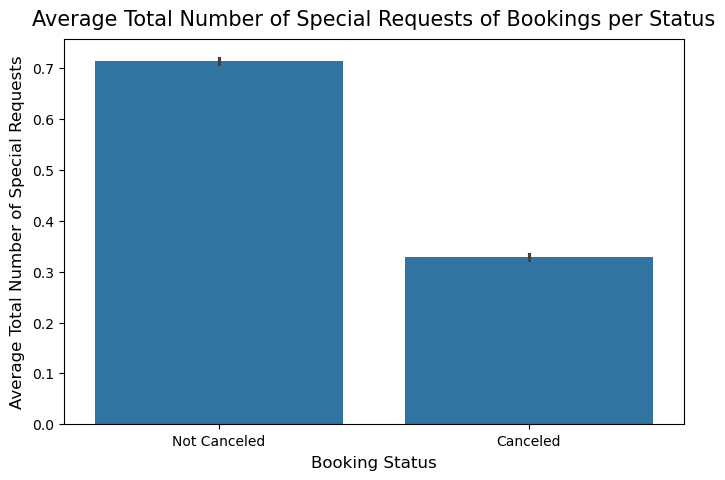

In [25]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['total_of_special_requests'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Customers who cancel their bookings make on average fewer special requests. Potential reasons why were discussed above.

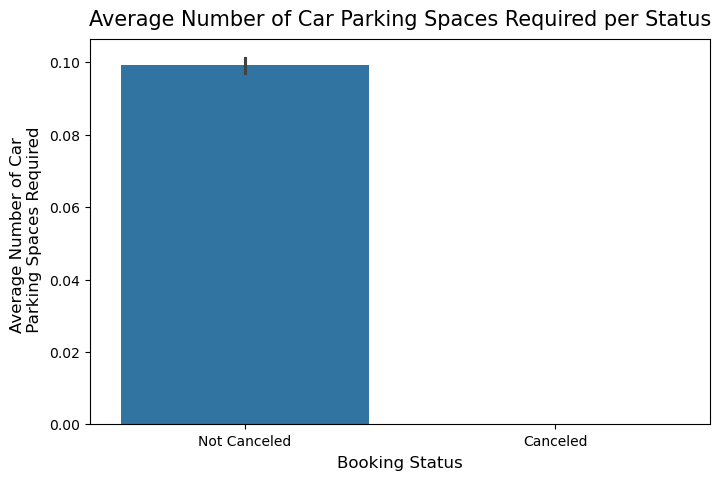

In [26]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 15, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

On average, customers who do not cancel their bookings tend to require more parking spaces. Similarly to the number of special requests, it would make sense that the more a customer engages with the hotel (by putting in a request for a parking spot), the less likely they are to cancel.

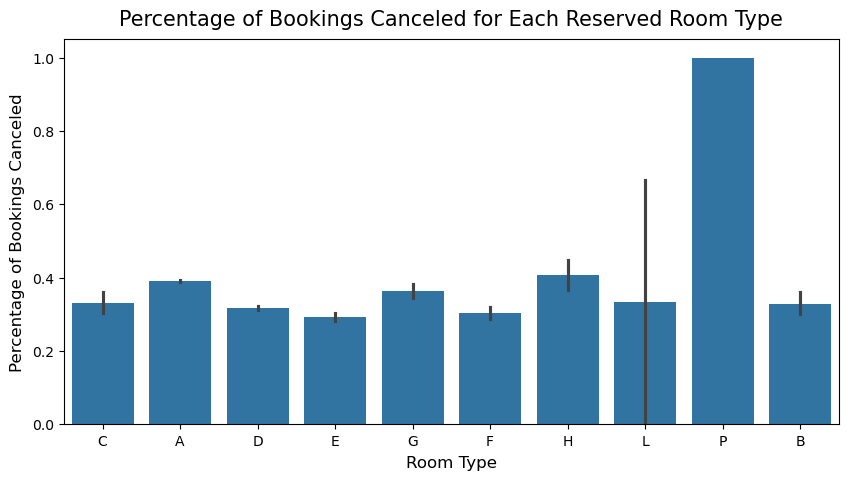

In [27]:
# Visualizing percentage of bookings canceled for each room type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 15, pad = 10)
sns.barplot(x=data['reserved_room_type'], y=data['is_canceled'])
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

Customers who reserved room type P have the highest percentage booking cancellation with 100% of bookings canceled. As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type P are canceled more often.

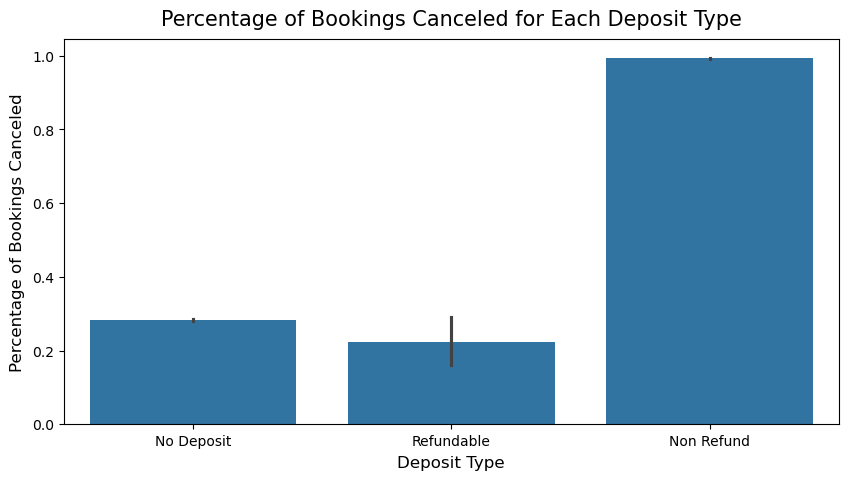

In [28]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 15, pad = 10)
sns.barplot(x=data['deposit_type'], y=data['is_canceled'])
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

Surprisingly, customers who pay a non-refundable deposit have a much higher percentage of canceled reservations. As this is a counter-intuitive finding, it is necessary to dig a little deeper into the characteristics of bookings with a non-refundable deposit.

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


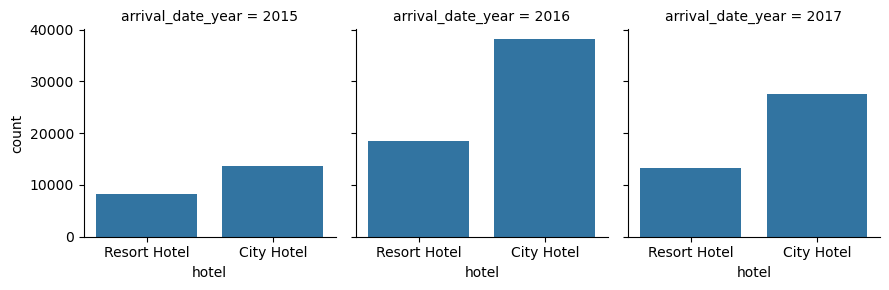

In [29]:
grid = sns.FacetGrid(data, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

In all three years city hotels saw more bookings than resort hotels.

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


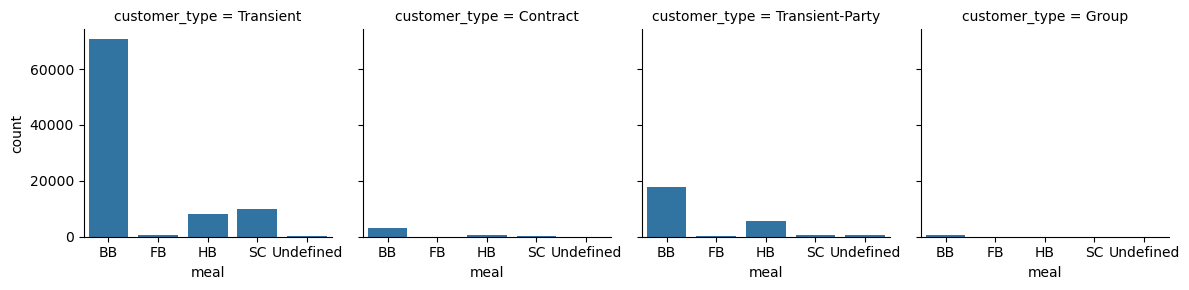

In [30]:
data['meal'].nunique(), data['customer_type'].nunique()
grid = sns.FacetGrid(data, col = 'customer_type')
grid.map(sns.countplot, 'meal')

Mainly all kinds of customers prefer BB type meals.

Text(0.5, 1.0, 'Reversed room type booked VS Hotel')

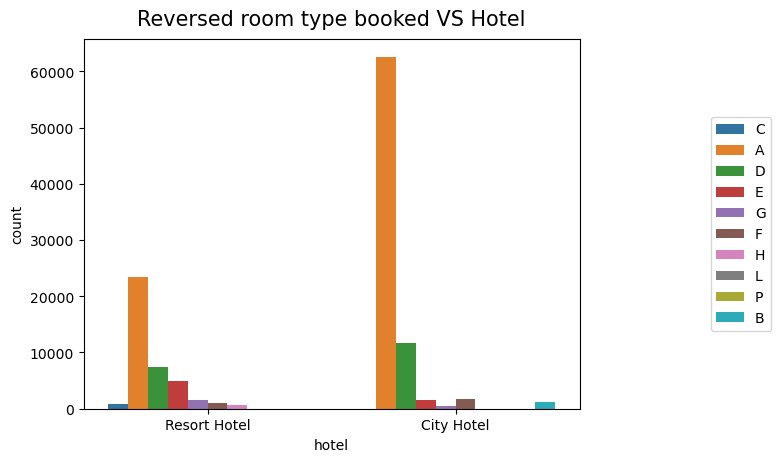

In [31]:
g = sns.countplot(data = data, x = 'hotel', hue = 'reserved_room_type')
g.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 1)
plt.title("Reversed room type booked VS Hotel", fontsize = 15, pad = 10)

- Resort hotels room preference : A, D, E
- City hotels room preference : A, D, F

In [32]:
print("TABLE 1")
print(data.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


For each kind of hotel, 

- Transient type of customers are the highest 
- followed by Transient Party
- Group bookings are the least

In [33]:
print(data.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


Each category of customers book hotels without deposit. Surprisingly, between refundable and non-refundable type, **higher number of people book hotels that are non-refundable**.

In [34]:
print(data.groupby(['customer_type', 'distribution_channel']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


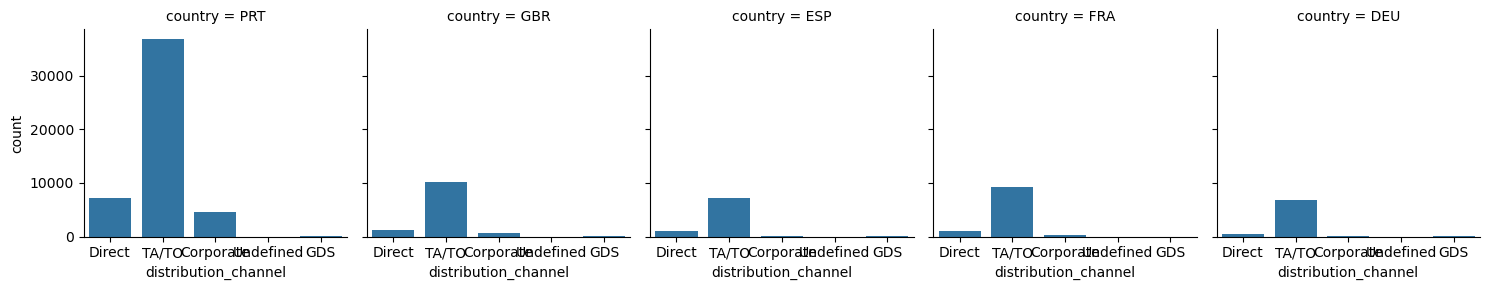

In [35]:
temp = data.loc[(data['country'] == 'PRT') | (data['country'] == 'GBR') | (data['country'] == 'FRA') | (data['country'] == 'ESP') | (data['country'] == 'DEU')]
grid = sns.FacetGrid(temp, col = 'country')
grid.map(sns.countplot, 'distribution_channel')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34060\3233049922.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = data, x = 'customer_type', y = 'total_of_special_requests', ci = None)


Text(0.5, 1.0, 'Total Number of Special Requests of Bookings per customer type')

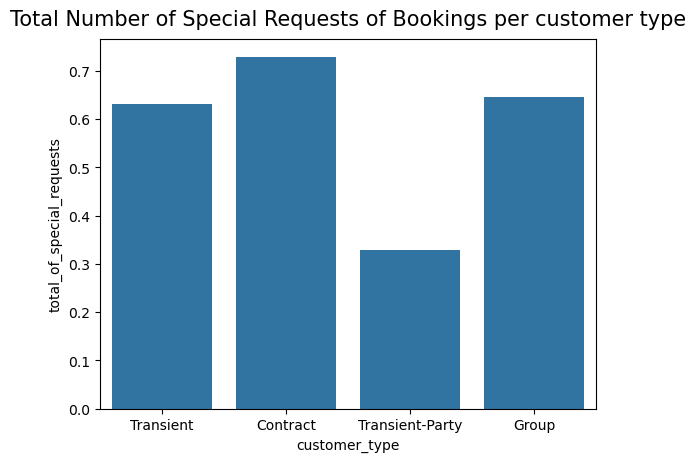

In [36]:
sns.barplot(data = data, x = 'customer_type', y = 'total_of_special_requests', ci = None)
plt.title("Total Number of Special Requests of Bookings per customer type", fontsize = 15, pad = 10)

Text(0.5, 1.0, 'Average lead time per distribution channel')

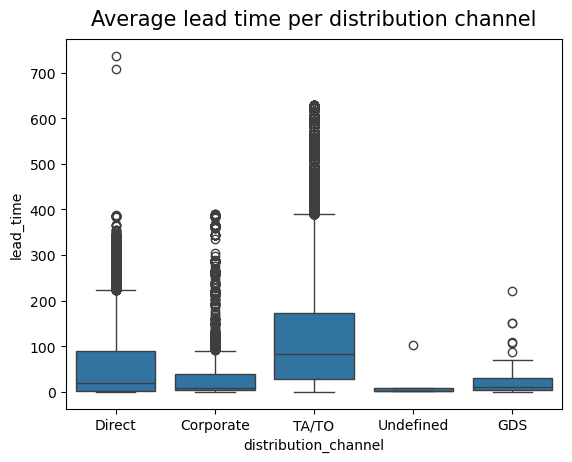

In [37]:
sns.boxplot(data=data, x='distribution_channel', y='lead_time')
plt.title("Average lead time per distribution channel", fontsize = 15, pad = 10)

## Feature Engineering

In [38]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
data.arrival_date_month = data.arrival_date_month.map(month_map).astype(int)

In [39]:
data['arrival_date'] = data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)

In [40]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

data['change_in_room'] = data.apply(roomChange, axis=1)

In [41]:
data['children'] = data['children'].fillna(0)
data['offspring'] = (data['children'] + data['babies']).astype(int)

In [42]:
data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

In [43]:
data['country'].fillna(data['country'].mode()[0], inplace = True)
data['agent'].fillna(data['agent'].mode()[0], inplace = True)
data['company'].fillna(data['company'].mode()[0], inplace = True)

In [44]:
for i in range(len(data)):
    if data.loc[i, 'country'] == 'PRT':
        data.at[i, 'country'] = 1
    elif data.loc[i, 'country'] == 'GBR':
        data.at[i, 'country'] = 2
    else:
        data.at[i, 'country'] = 0

In [45]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [46]:
data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] = data['stay_duration'] / np.timedelta64(1, 'D')
data['stay_duration'] = data['stay_duration'].astype(int)

In [47]:
for i in range(len(data)):
    if data.loc[i, 'stay_duration'] < 0:
        data.at[i, 'stay_duration'] = -1

In [48]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    data[item] = lb.fit_transform(data[item])

In [49]:
data = pd.get_dummies(data, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [50]:
data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis = 1, inplace = True)

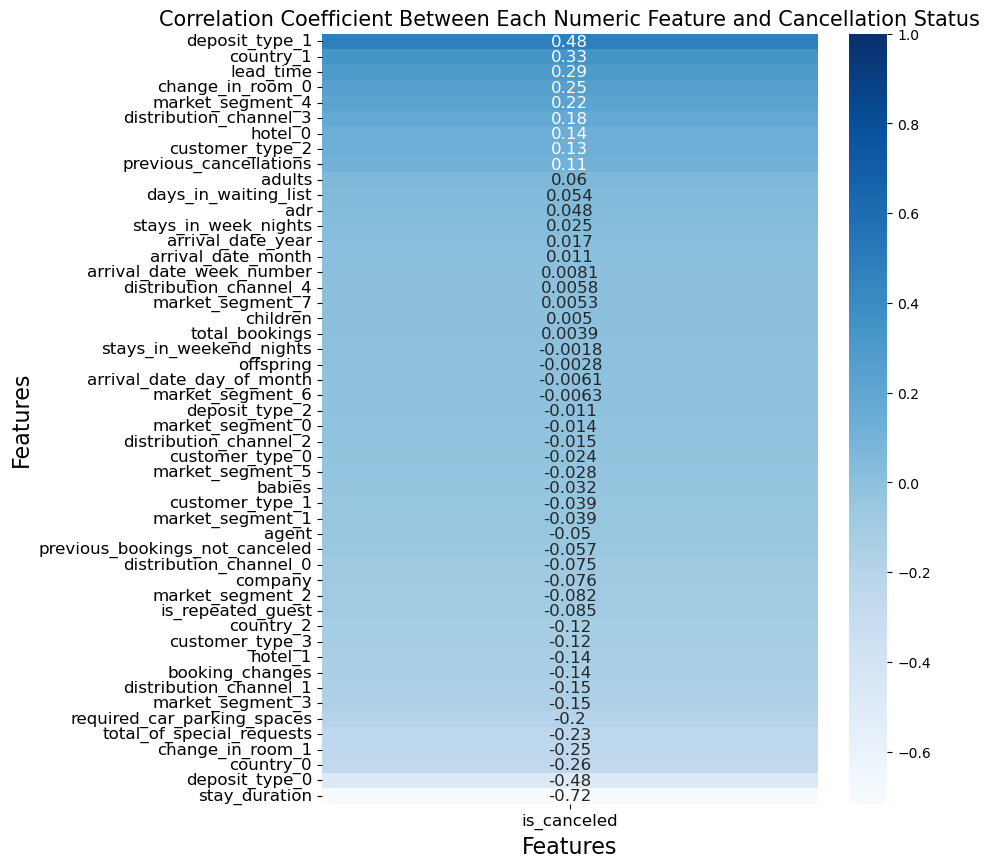

In [51]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=15)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

- highest positive correlations : `lead_time` followed by `previous_cancellations`
- highest negative correlations : `total_of_special_requests`, `required_car_parking_spaces`

## Model Creation

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile

In [53]:
# Separate features and predicted value
X = data.drop(columns=['is_canceled'], axis=1)
y = data['is_canceled']

In [54]:
# 70 % for training, 30 % for validation

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83573, 50), (83573,), (35817, 50), (35817,))

## Scaling the data

In [58]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

### Logistic Regression

In [59]:
#Logistic Regression

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
confusion_matrix(y_test, logreg_pred)

Average cross validation score: 0.990
Test accuracy: 0.992
F1 score: 0.989


array([[22457,    21],
       [  258, 13081]], dtype=int64)

### Decision Tree Classifier

In [60]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv = 5)
tree_pred = tree.predict(X_test)

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[22268   210]
 [    0 13339]]


## Hypothesis Testing

Hypothesis 1: Special Requests and Cancellations

Null Hypothesis (H0): The average number of special requests is the same for bookings that were canceled and those that were not.
Alternative Hypothesis (H1): There is a significant difference in the average number of special requests between canceled and non-canceled bookings.
This test can be done using a two-sample t-test.

In [63]:
from scipy.stats import ttest_ind

import pandas as pd

df = pd.read_csv('hotel_bookings.csv')

df.dropna(inplace=True)  # Clean any missing values if necessary


# Separate data based on cancellation status
requests_canceled = df[df['is_canceled'] == 1]['total_of_special_requests']
requests_not_canceled = df[df['is_canceled'] == 0]['total_of_special_requests']

# Perform the t-test
t_stat, p_val = ttest_ind(requests_canceled, requests_not_canceled, equal_var=False)

print("T-test results for Special Requests:")
print("t-statistic:", t_stat)
print("p-value:", p_val)


T-test results for Special Requests:
t-statistic: -5.371837552923982
p-value: 2.1647673014648012e-07


#### Because p-value is baove 0.05 we cannot reject the null hypothesis

Hypothesis 2: Customer Type and Cancellation Rate

Null Hypothesis (H0): The proportion of cancellations is the same across different customer types (e.g., "Transient," "Group").
Alternative Hypothesis (H1): The proportion of cancellations varies by customer type.

In [65]:
from scipy.stats import ttest_ind

# Separate data based on cancellation status
canceled = df[df['is_canceled'] == 1]['lead_time']
not_canceled = df[df['is_canceled'] == 0]['lead_time']

# Perform the t-test
t_stat, p_val = ttest_ind(canceled, not_canceled, equal_var=False)

print("T-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)


T-test results:
t-statistic: -1.1551881732909208
p-value: 0.25591217603102256


### Because p-value is below 0.05 we reject the null hypothesis